# Multiple Linear Regression Analysis

Multiple Linear Regression is an extension of simple linear regression used to predict an outcome variable (or dependent variable) based on multiple predictor variables (or independent variables). The main idea is to examine how multiple predictors collectively influence the outcome variable.

## Analysis Background

### Analysis Objective:

In our analysis, we will use three predictor variables (`TV`, `Radio`, and `Newspaper`) to predict Sales.

### The Dataset Description:

The Advertising dataset is a classic dataset used in linear regression examples. It contains data about sales of a product in 200 different markets, alongside advertising budgets for three different media: TV, radio, and newspaper.

The dataset contains four columns:

1. `TV:` Advertising budget spent on TV (in thousands of dollars).
2. `Radio:` Advertising budget spent on Radio (in thousands of dollars).
3. `Newspaper:` Advertising budget spent on Newspaper (in thousands of dollars).
4. `Sales:` Sales reach (likely in thousands of units).

# The Analysis

## Step 1: Install and import packages

In [2]:
# ! pip install kaggle

In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import requests
import urllib.request
import kaggle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression





## Step 2: Download Dataset from Kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/KaggleToken/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets download ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 3.74MB/s]


In [15]:
zipfile.ZipFile("advertising-dataset.zip", "r").extractall(".")

## Step 3: Read in data and preview

In [16]:
df = pd.read_csv('advertising.csv', encoding='latin-1')

In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Step 4: Conduct Exploratory Data Analysis (EDA)

Before we delve into modeling, it's essential to conduct an initial analysis of the data to get a sense of its distribution, relationships, and potential outliers. Let's visualize the relationships between each advertising medium (`TV`, `Radio`, `Newspaper`) and Sales using scatter plots.

In [20]:
# Print the number of rows and columns in the dataset
print(df.shape)

(200, 4)


In [22]:
# Print the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Observations:
- All columns are of the float (numerical) data types.

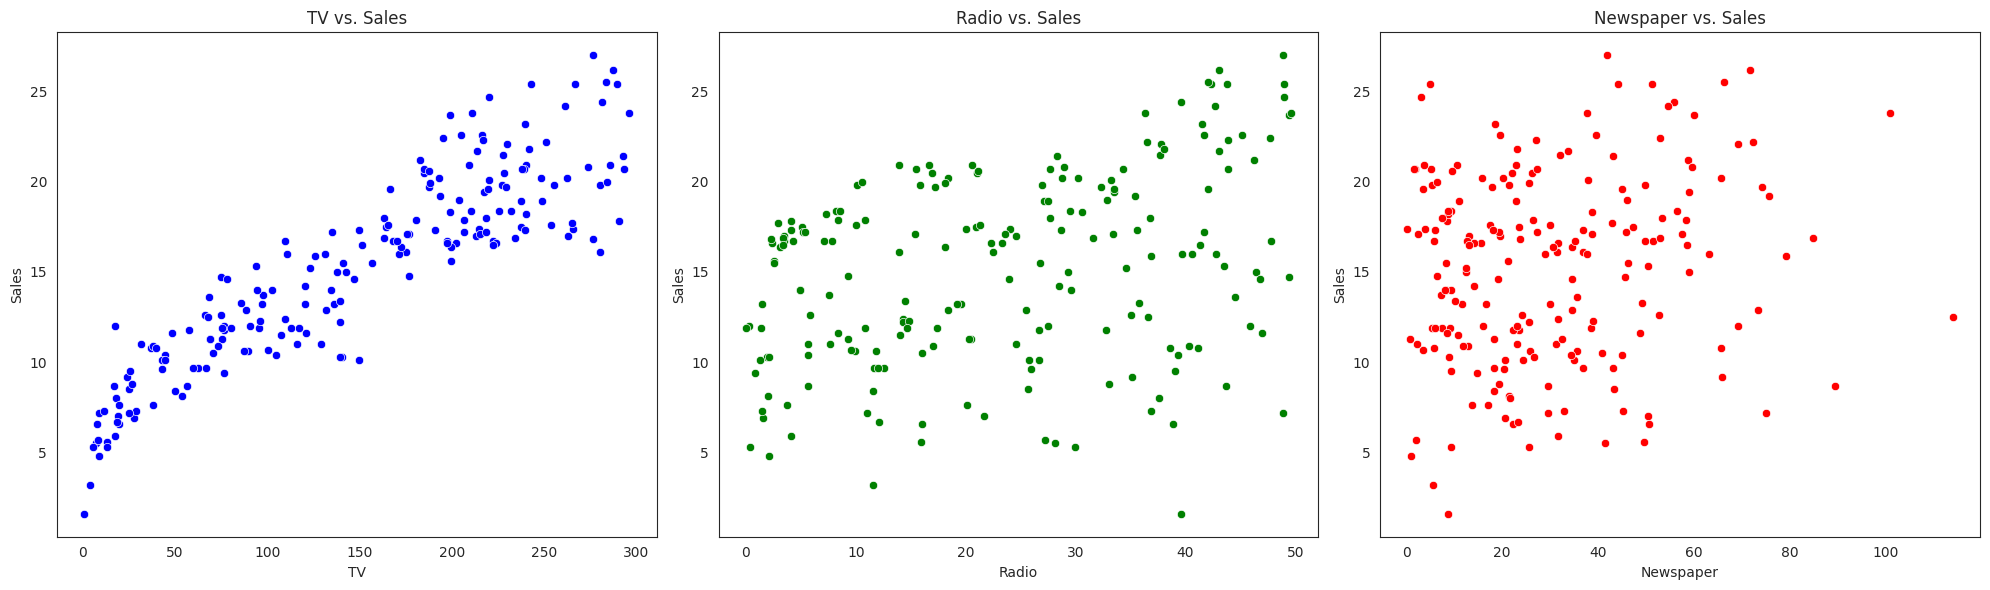

In [33]:
# # Set up the aesthetic style of the plots
# sns.set_style("whitegrid")
sns.set_style("white")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot scatter plots for each advertising medium vs. Sales
sns.scatterplot(data=df, x='TV', y='Sales', ax=axes[0], color='blue')
axes[0].set_title('TV vs. Sales')
sns.scatterplot(data=df, x='Radio', y='Sales', ax=axes[1], color='green')
axes[1].set_title('Radio vs. Sales')
sns.scatterplot(data=df, x='Newspaper', y='Sales', ax=axes[2], color='red')
axes[2].set_title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()

#### Observations:

From the scatter plots, we can make a few observations:

1. `TV vs. Sales:` There appears to be a positive linear relationship between TV advertising spend and sales. As the budget on TV advertising increases, sales also tend to increase.
2. `Radio vs. Sales:` There's also a positive relationship between radio advertising spend and sales, though the data points are more scattered than in the TV vs. Sales plot.
3. `Newspaper vs. Sales:` The relationship between newspaper advertising spend and sales is less clear. The data points are quite scattered, indicating a weaker or possibly no linear relationship.

In [28]:
# Display basic summary statistics
summary_statistics = df.describe().T
summary_statistics

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


#### Observations:

For the 'TV' column:
- The mean is 147.0425.
- The median (50th percentile) is 149.75.
- The maximum value is 2296.4.

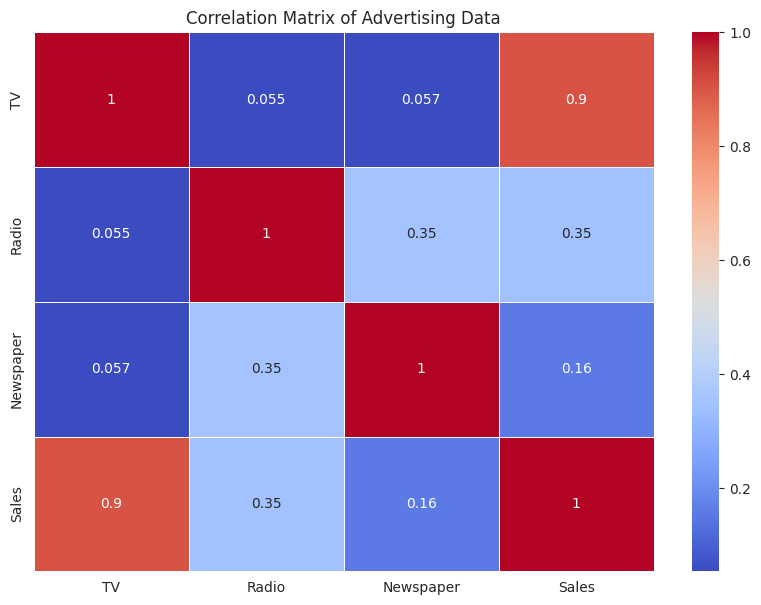

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Advertising Data')
plt.show()

#### Observations:

The correlation matrix heatmap provides insights into the relationships between the variables:

1. `TV and Sales:` There's a strong positive correlation (approximately 0.78), which indicates that as the TV advertising budget increases, sales tend to increase as well.
2. `Radio and Sales:` There's a moderate positive correlation (approximately 0.58), indicating a positive relationship between radio advertising and sales, though not as strong as TV.
3. `Newspaper and Sales:` The correlation is relatively low (approximately 0.23), indicating a weaker relationship between newspaper advertising and sales.

Additionally, it's worth noting that there are some correlations between the advertising mediums themselves. For instance, there's a positive correlation between Radio and Newspaper, though it's not very strong.

## Step 5: Data Preprocessing
Before training a model, we need to ensure that our data is clean and prepared. Let's check for any missing values in the dataset.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)

missing_data

#### Observations:

There are no missing values in the dataset, which is excellent news. Since the data appears to be clean, we can move on to the next step.

## Step 6: Split the Data into Training and Testing Sets
To evaluate the performance of our model, we'll split the data into a training set (to train the model) and a testing set (to evaluate the model). Typically, around 70-80% of the data is used for training, and the remainder is used for testing. Let's proceed with this split.

In [36]:
# Define the features (X) and the target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [37]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160, 3), (40, 3))

#### Observations:

The data has been successfully split into training and testing sets. We have:

- 160 samples in the training set
- 40 samples in the testing set

## Step 7: Train a Linear Regression Model
Now, let's train a linear regression model using the training data.

In [39]:
# Initialize the linear regression model
lr_model = LinearRegression()

In [40]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

The linear regression model has been trained using the training data.

## Step 8: Evaluate the Model
To evaluate the model's performance, we'll calculate the R square score (coefficient of determination) on the testing set. This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A value of 1 indicates perfect prediction, while a value of 0 indicates that the model does not perform better than simply predicting the mean of the dependent variable.

In [41]:
# Predict the sales on the testing set
y_pred = lr_model.predict(X_test)

# Calculate the R^2 score
from sklearn.metrics import r2_score
test_r2_score = r2_score(y_test, y_pred)

test_r2_score

0.9059011844150826

#### Observations

The r2 score for the model on the test set is approximately 0.906. This indicates that around 90.6% of the variability in the sales can be explained by the advertising spend on TV, Radio, and Newspaper. This is a relatively high
r2 score, suggesting that our linear regression model fits the test data quite well.

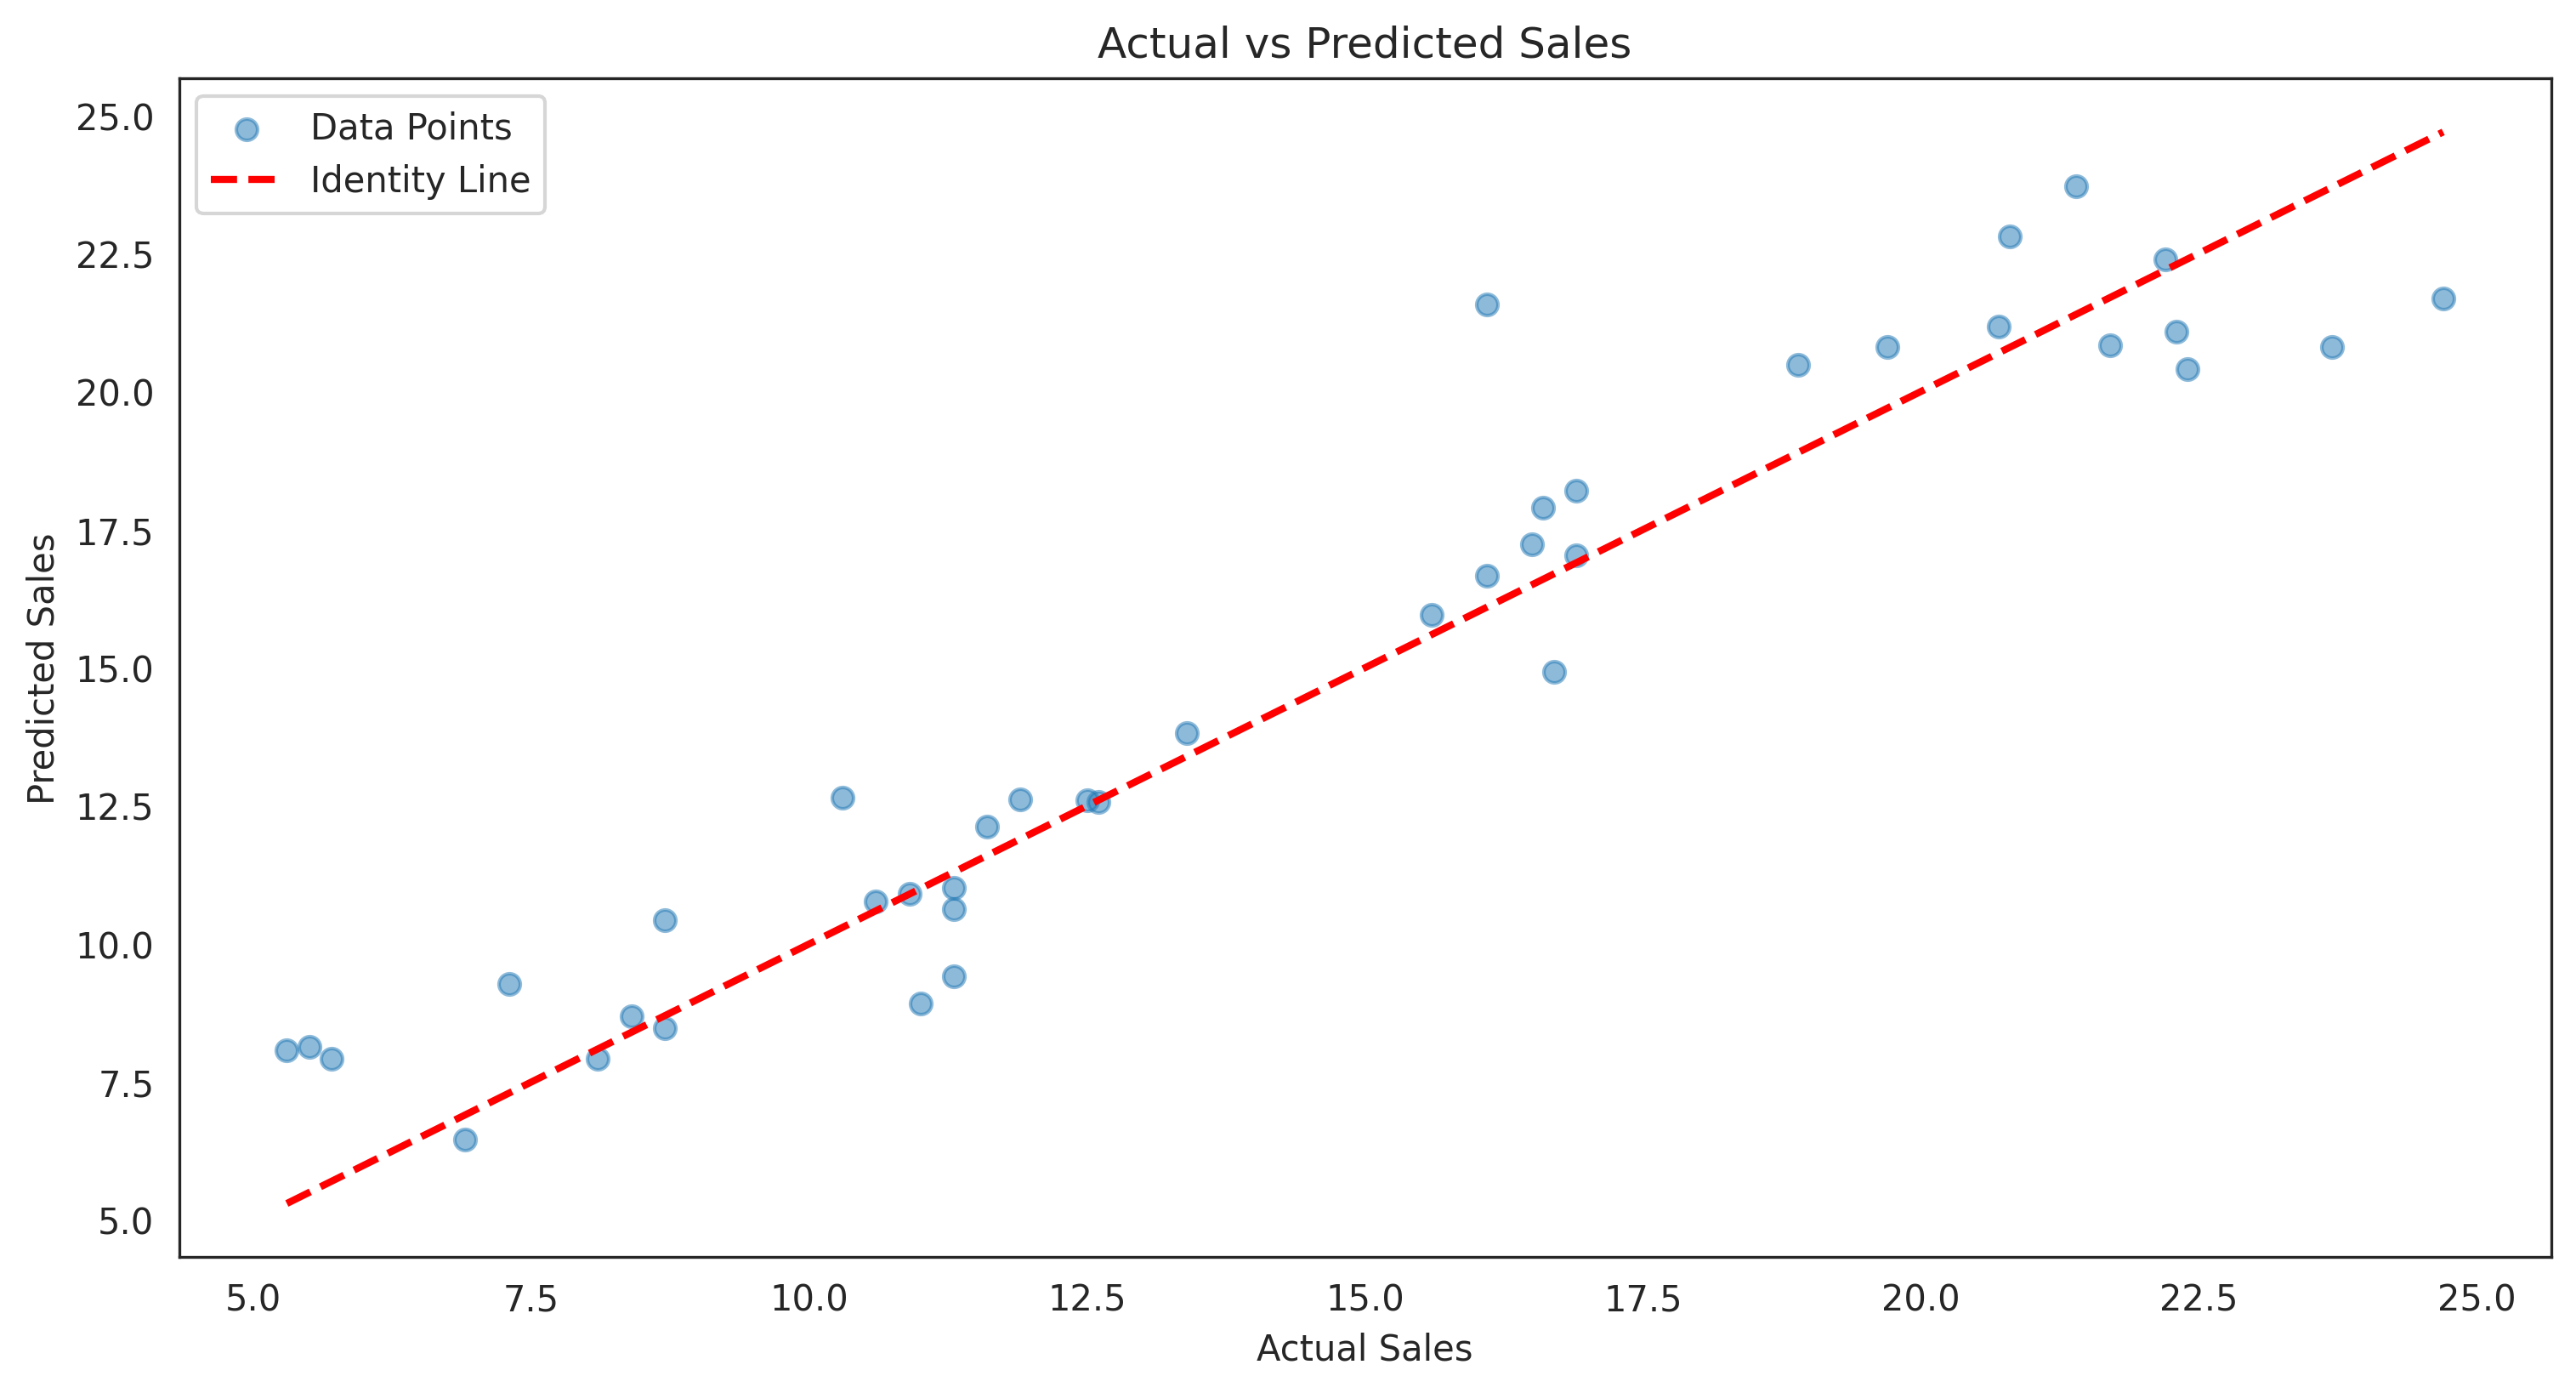

In [46]:
# Plotting the actual vs. predicted sales as per the provided code
plt.figure(figsize=(12, 6), dpi=300)  # Set DPI to 300
plt.scatter(y_test, y_pred, alpha=0.5, label="Data Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label="Identity Line")
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(False)  # Remove grid
plt.legend()  # Add legend
plt.show()

#### Observations

- The scatter points represent the data points from the test set.
- The red dashed line is the identity line, where the predicted sales would be equal to the actual sales. Ideally, all points would lie on this line if our predictions were perfect.

The closer the data points are to the identity line, the better the model's predictions.

1. `Close Proximity to Identity Line:` Most of the data points are close to the red identity line, indicating that our model's predictions are generally accurate. This is consistent with the high r2 score we observed earlier.
2. `Symmetry:` The data points are symmetrically distributed around the identity line. This suggests that the model doesn't consistently overpredict or underpredict sales, but rather that its errors are balanced in both directions.
3. `Few Outliers:` While most predictions are accurate, there are a few points further from the identity line. These represent instances where the model's predictions were less accurate. Understanding the reasons behind these outliers might require deeper analysis, possibly looking at the specific features of those data points or considering external factors not included in the dataset.
4. `Consistency Across Sales Range:` The model seems to perform consistently across the range of sales values, from low to high. This is a good sign, as it indicates that the model is not biased towards a particular range of sales values.

In summary, the chart suggests that the linear regression model does a commendable job in predicting sales based on the advertising spend across TV, Radio, and Newspaper. However, like all models, it's not perfect and has areas where it can potentially be improved.

## Step 9: Make a Prediction for New Data
We will predict the sales for a new advertising campaign that spends $100,000 on TV advertising (keeping other features at their means, since they were not specified).

In [42]:
# Predicting sales for a new advertising campaign that spends $100,000 on TV advertising
# We will keep other features (Radio and Newspaper) at their means

# Calculate the mean values for Radio and Newspaper from the training data
mean_radio = X_train['Radio'].mean()
mean_newspaper = X_train['Newspaper'].mean()

# Make the prediction
new_data = [[100000, mean_radio, mean_newspaper]]
predicted_sales = lr_model.predict(new_data)

predicted_sales[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5458.080261979271

#### Observations

For a new advertising campaign that spends $100,000 on TV advertising (while keeping the spend on Radio and Newspaper at their average values), the predicted sales is approximately 5,458 units (or 5,458,000 if we consider the values to be in thousands).

# Summary:
- We conducted exploratory data analysis and observed the relationships between advertising spends and sales.
- The dataset had no missing values, so we proceeded to split it into training and testing sets.
- We trained a linear regression model using the training data and achieved an
r2 score of approximately 0.906 on the test set.
- Finally, we made a prediction for a hypothetical new advertising campaign.

# Sources and resource:
- Dataset: https://www.kaggle.com/datasets/ashydv/advertising-dataset/